In [1]:
from adabkb import SafeAdaBKB
from adabkb.options import OptimizerOptions

import numpy as np

from sklearn.gaussian_process.kernels import RBF

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

[0.0]


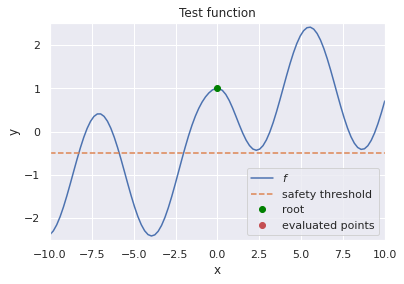

In [2]:

f = lambda x:  np.cos(x) + np.tanh(x) - np.sin(x)


jmin = -0.5
def plot_fun(f, points, lims=[-10, 11]):
    root = points[0]
    points = points[:-1]
    fig, ax = plt.subplots()
    X = np.linspace(lims[0], lims[1], 100)
    y = f(X)
    ax.plot(X, y, '-', label="$f$")
    ax.plot(X, [jmin for _ in range(X.shape[0])], '--', label="safety threshold")
    ax.plot(root, f(root), 'o', c="green", ms=6,label="root")
    ax.plot(points, [f(x) for x in points], 'ro', ms=6,label="evaluated points")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim([X.min(), X.max()])
    ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
    ax.legend(loc="lower right")
    ax.set_title("Test function")

def plot_average_regret(avg_reg):
    fig, ax = plt.subplots()
    ax.set_title("Average Regret")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$R_T$")
    ax.plot(range(len(avg_reg)), avg_reg, '-', label="average regret")
    ax.legend(loc="upper right")

lims = [-10.0, 10.0]
points = [np.mean(lims)]
print(points)
plot_fun(f, points, lims)


[--] jmin: -0.5
[--] update completed in 0.001694 seconds.
[--] I: 0.0	Vh: 0.8819171036881969
[--] expand
[--] I: 1.5335900212931644	Vh: 0.1259881576697424
[--] xt: [-2.85714286]	 yt: [-1.67261148]
[--] update completed in 0.006300 seconds.
[--] I: 2.3996533302345275	Vh: 0.1259881576697424
[--] xt: [2.85714286]	 yt: [-0.24702092]
[--] update completed in 0.010240 seconds.
[--] I: 1.1259981573301228	Vh: 0.1259881576697424
[--] expand
[--] I: 1.1556828074379175	Vh: 0.017998308238534627
[--] xt: [0.81632653]	 yt: [0.62933317]
[--] update completed in 0.008565 seconds.
[--] I: 1.7406918374065274	Vh: 0.1259881576697424
[--] xt: [8.57142857]	 yt: [-0.41094992]
[--] update completed in 0.008277 seconds.
[--] I: 1.0584350182301192	Vh: 0.017998308238534627
[--] expand
[--] I: 1.0452542443807311	Vh: 0.0025711868912192326
[--] xt: [-0.34985423]	 yt: [0.9459373]
[--] update completed in 0.007757 seconds.
[--] I: 3.3658747026083624	Vh: 0.1259881576697424
[--] xt: [5.71428571]	 yt: [2.38117781]
[--]

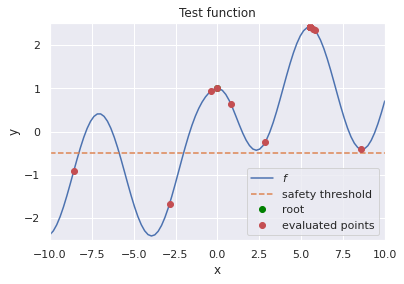

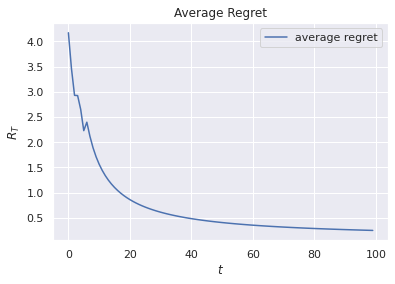

In [3]:
N = 7
sigma = 3.0
lam = 1e-10
gfun = lambda x: 1/sigma * x
v_1 = np.sqrt(N)
rho = 1/N
kernel = RBF(sigma)

lims = [-10.0, 10.0]
search_space = np.array(lims).reshape(-1, 2)
budget = 100
h_max = 5
t = 0
print("[--] jmin: {}".format(jmin))
options = OptimizerOptions(gfun,
        v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=1e-3,
         qbar= 3,
         jmin=jmin,
         verbose=True)
opt = SafeAdaBKB(kernel, options)
fun_max = 2.5
avg_reg = []
opt.initialize(search_space, f(search_space.mean(axis=1)), N, h_max)
while t < budget:
    xt, node_idx = opt.step()
    if node_idx is None:
        break
    yt = f(xt)
    avg_reg.append(fun_max - yt)
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    if node_idx is None:
        break
    opt.update_model(node_idx, yt)
    t+=1
avg_reg = np.cumsum(avg_reg)
avg_reg = [avg_reg[t]/(t+1) for t in range(len(avg_reg))]
plot_fun(f, points, lims)
plot_average_regret(avg_reg)


[--] update completed in 0.001258 seconds.
[--] Initialization done!
[--] I: 0.0	Vh: 3.0
[--] expand
[--] I: 1.2323256997519068	Vh: 1.0
[--] expand
[--] I: 0.56565903308524	Vh: 0.3333333333333333
[--] expand
[--] I: 0.3434368108630178	Vh: 0.11111111111111108
[--] expand
[--] I: 0.3607552653529106	Vh: 0.03703703703703703
[--] xk: [1.67242825]	|grad|: 1.015020845152037	lcb: [-0.60514007]	j_min: 0.15
[--] xk: [1.34220185]	|grad|: 0.660452803558087	lcb: [-0.3489415]	j_min: 0.15
[--] xk: [1.04812801]	|grad|: 0.882221518061499	lcb: [-0.06941263]	j_min: 0.15
[--] xk: [0.79772165]	|grad|: 1.0016254492484222	lcb: [0.18435591]	j_min: 0.15
[--] Found safe xk: [0.79772165]
[--] xt: [0.79772165]	 yt: [0.25616112]
[--] update completed in 0.016244 seconds.
[--] I: 1.1754054033906722	Vh: 0.3333333333333333
[--] xk: [0.82982719]	|grad|: 0.7535061463670445	lcb: [0.27004464]	j_min: 0.15
[--] Found safe xk: [0.82982719]
[--] xt: [0.82982719]	 yt: [0.27218529]
[--] update completed in 0.017873 seconds.
[-

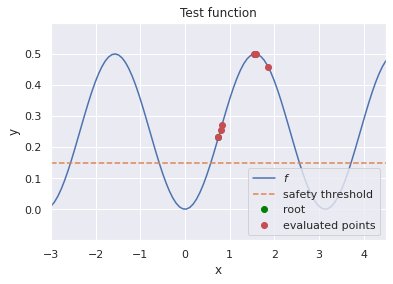

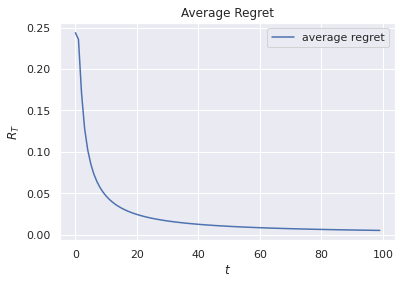

In [4]:
N = 3
sigma = 1.0
lam = 1e-10
gfun = lambda x: 1/sigma * x
v_1 = N#np.sqrt(N) 
rho =1/N
jmin = 0.15
kernel = RBF(sigma)
search_space = np.array([-3.0, 4.5]).reshape(-1, 2)
budget = 100
h_max = 5
t = 0
f = lambda x :  1/2 * np.sin(x)**2
lims = [-3.0, 4.5]
points = [np.mean(lims)]
#plot_fun(f, [np.mean(lims)], lims=lims)
options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=0.025,
         qbar= 3,
         jmin=jmin,
         verbose=True)
opt = SafeAdaBKB(kernel, options)
opt.initialize(search_space, f(search_space.mean(axis=1)), N, h_max)
print("[--] Initialization done!")
c_reg = []
real_max = 0.5
while t < budget:
    xt, node_idx = opt.step()
    if node_idx is None:
        break
    yt = f(xt)
    c_reg.append(np.abs(real_max - yt))
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
plot_fun(f, points, lims)
c_reg = np.cumsum(c_reg)
c_reg = [c_reg[t]/(t+1) for t in range(len(c_reg)) ]
plot_average_regret(c_reg)



[--] I: 0.0	Vh: 3.0
[--] expand
[--] I: 2.0653803888224616	Vh: 1.0
[--] expand
[--] I: 1.398713722155795	Vh: 0.3333333333333333
[--] expand
[--] I: 1.176491499933573	Vh: 0.11111111111111108
[--] expand
[--] I: 1.1024174258594988	Vh: 0.03703703703703703
[--] expand
[--] I: 1.0980451292064686	Vh: 0.012345679012345675
[--] xk: [3.00115768]	|grad|: 1.021733808670433	lcb: [-0.150262]	j_min: 1.05
[--] xk: [2.44712086]	|grad|: 1.1080736328494822	lcb: [0.53828421]	j_min: 1.05
[--] xk: [2.01673217]	|grad|: 1.29116606295554	lcb: [1.04846682]	j_min: 1.05
[--] xk: [1.76229903]	|grad|: 1.017732564889684	lcb: [0.80126521]	j_min: 1.05
[--] xk: [2.00324452]	|grad|: 1.2047274289272991	lcb: [1.06209814]	j_min: 1.05
[--] Found safe xk: [2.00324452]
[--] xt: [2.00324452]	 yt: [1.06520166]
[--] I: 1.4654123945075033	Vh: 0.3333333333333333
[--] expand
[--] I: 1.1908060733051806	Vh: 0.11111111111111108
[--] expand
[--] I: 1.174100832490983	Vh: 0.11111111111111108
[--] expand
[--] I: 1.1167319992311064	Vh: 0.

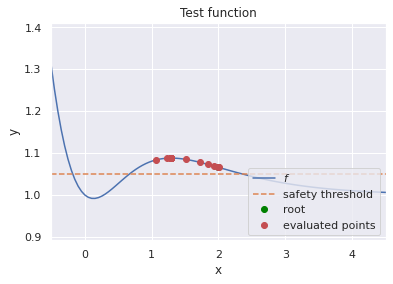

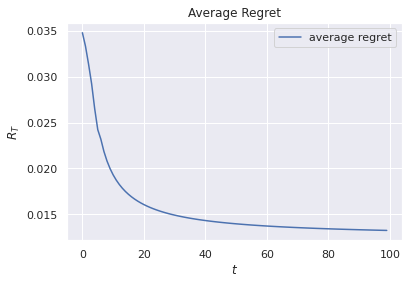

In [5]:
N = 3
sigma =1.0
lam = 1e-9
gfun = lambda x: 1/sigma * x
v_1 = N 
rho =1/N
jmin = 1.05
kernel = RBF(sigma)
lims = [-0.50, 4.5]
search_space = np.array(lims).reshape(-1, 2)
budget = 100
h_max = 5
t = 0
f = lambda x :  np.tanh(x) + 1/(np.pi**x)
points = [np.mean(lims)]
#plot_fun(f, [np.mean(lims)], lims=lims)
options = OptimizerOptions(gfun, v_1 = v_1, rho=rho, lam=lam, noise_var = lam**2,\
         delta=1e-5,
         qbar= 3,
         jmin=jmin)
opt = SafeAdaBKB(kernel, options)
opt.initialize(search_space, f(search_space.mean(axis=1)), N,  h_max)
avg_reg = []
real_max = 1.1
while t < budget:
    xt, node_idx = opt.step()
    if node_idx is None:
        break
    yt = f(xt)
    avg_reg.append(np.abs(real_max - yt))
    print("[--] xt: {}\t yt: {}".format(xt,yt))
    points.append(xt[0])
    opt.update_model(node_idx, yt)
    t+=1
plot_fun(f, points, lims)
avg_reg = np.cumsum(avg_reg)
avg_reg = [avg_reg[t]/(t+1) for t in range(len(avg_reg)) ]
plot_average_regret(avg_reg)

